# LFV Higgs decays in the 2HDM with  SeeSaw type I

In [1]:
from sympy import init_printing,lambdify,Symbol, symbols, Matrix
init_printing()
import OneLoopLFVHD as lfvhd

In [2]:
from THDM_seesaw_FF import TrianglesOneFermion, TrianglesTwoFermion, Bubbles
from THDM_seesaw_FF import g, mW, mG, mHpm, mϕ, Uν, Uνc, mn, m, C, Cc, a,b,i
from THDM_seesaw_FF import j as jj
from THDM_seesaw_FF import ξlϕ, ξnϕ, ξlA, ξnA,α, β, Ξϕ, Kϕ, Qϕ,ρϕ, Δϕ,ηϕ, λ5

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from mpmath import *

In [74]:
mp.dps = 80; mp.pretty = True

In [6]:
import numpy as np

In [7]:
import subprocess as s

In [8]:
from multiprocessing import Pool
from time import time

In [9]:
def speedup_array(f,array,procs=4): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array)
    result = np.array(list(pool))
    return result

## Numeric implementation of form factors

**Neutrino benchmark** is given by 

In [10]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [11]:
m1 = mpf('1e-12')  #GeV 

#current values to Square mass differences
d21 = mpf(str(Nudata.squareDm21.central))*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mpf(str(Nudata.squareDm31.central))*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

## Setting 2HDM

In [12]:
from sympy import cos as cos_sp
from sympy import sin as sin_sp
from sympy import cot as cot_sp
from sympy import tan as tan_sp

In [13]:
typeI_ξh = {ξlφ:cos_sp(α)/sin_sp(β),ξnφ:cos_sp(α)/sin_sp(β),ξlA:-cot_sp(β),ξnA:-cot_sp(β)}
typeI_ξH = {ξlφ:sin_sp(α)/sin_sp(β),ξnφ:sin_sp(α)/sin_sp(β),ξlA:-cot_sp(β),ξnA:-cot_sp(β)}

typeII_ξh = {ξlφ:-sin_sp(α)/cos_sp(β),ξnφ:cos_sp(α)/sin_sp(β),ξlA:tan_sp(β),ξnA:-cot_sp(β)}
typeII_ξH = {ξlφ:cos_sp(α)/cos_sp(β),ξnφ:sin_sp(α)/sin_sp(β),ξlA:tan_sp(β),ξnA:-cot_sp(β)}

lepton_ξh = {ξlφ:-sin_sp(α)/cos_sp(β),ξnφ:-sin_sp(α)/cos_sp(β),ξlA:tan_sp(β),ξnA:tan_sp(β)}
lepton_ξH = {ξlφ:cos_sp(α)/cos_sp(β),ξnφ:cos_sp(α)/cos_sp(β),ξlA:tan_sp(β),ξnA:tan_sp(β)}

flipped_ξh = {ξlφ:cos_sp(α)/sin_sp(β),ξnφ:-sin_sp(α)/cos_sp(β),ξlA:-cot_sp(β),ξnA:tan_sp(β)}
flipped_ξH = {ξlφ:sin_sp(α)/sin_sp(β),ξnφ:cos_sp(α)/cos_sp(β),ξlA:-cot_sp(β),ξnA:tan_sp(β)}


mA,mH, mh = symbols('m_A,m_H, m_h ',positive=True)
common_factor_h = {mϕ:mh, Ξϕ:sin_sp(β - α), ηϕ:cos_sp(β - α), Kϕ: 4*mA**2 - 3*mh**2- 2*mHpm**2, 
                   Qϕ:mh**2 - 2*mHpm**2 , ρϕ: cos_sp(α + β), Δϕ:cos_sp(α - 3*β)}

common_factor_H = {mϕ:mH, Ξϕ:cos_sp(β - α), ηϕ:-sin_sp(β - α), Kϕ: 4*mA**2 - 3*mH**2- 2*mHpm**2, 
                   Qϕ:mH**2 - 2*mHpm**2 , ρϕ: sin_sp(α + β), Δϕ:sin_sp(α - 3*β)}

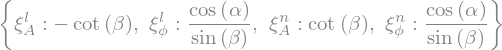

In [14]:
typeI_ξh 

### Form factor with one fermion in the loop.

In [15]:
# for D in TrianglesOneFermion:
#     display(D.AL().atoms(Symbol))

#### AL one fermion 

In [16]:
from OneLoopLFVHD.data import ml

In [17]:
ma,mb = symbols('m_a,m_b',positive=True)
valores_h ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}

cambios_hab = lambda a,b:{lfvhd.ma:valores_h[mh],lfvhd.mi:ml[a],lfvhd.mj:ml[b]}


Ubi, Ucai,mni = symbols('U_{bi}, {{U_{ai}^*}},m_{n_i}')
UnuOne = {mn[i]:mni,Uν[b,i]:Ubi,Uνc[a,i]:Ucai}

# from Unu_seesaw_2HDM import diagonalizationMnu
# diagonalizationMnu1 = lambda m1,m6,tb,doblet: diagonalizationMnu(
#     m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6,tb,doblet)

from Unu_seesaw import diagonalizationMnu

diagonalizationMnu1 = lambda m1,m6: diagonalizationMnu(
    m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6)

In [18]:
def GIM_One(exp):
    from sympy import Add
    args = exp.expand().args
    func = exp.expand().func
    if isinstance(func,Add):
        X = Add(*[t for t in args if t.has(mni)]).simplify()
    else:
        X = exp
    #X1 = X.collect([mni],evaluate=False)
    return X#mni**2*X1[mni**2]

In [19]:
def sumOne(m6,Aab,aa,bb,mHpm_val, mA_val, alpha, beta, l5): 
    mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)
    Unu = UnuL
    Unu_dagger = UnuR
    AL = []
    for k in range(1,7):
        #print(mnk[k-1],Unu[b-1,k-1],conj(Unu[a-1,k-1]))
        #A = Aab(mnk[k-1],Unu[b-1,k-1],conj(Unu[a-1,k-1]),mHpm, mA, alpha, beta,l5)
        A = Aab(mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],mHpm_val, mA_val, alpha, beta,l5)
        #print('Ai = ',A)
        AL.append(A)
    return mp.fsum(AL)


In [20]:
from OneLoopLFVHD.data import replaceBs, pave_functions

In [127]:
mHpm_aux = symbols('mHpm',positive=True)
def numeric_sum_diagramsOne(a,b,mHpm_n, mA_n, alpha, beta, l5,quirality='L',
                            common_factor=common_factor_h,
                            type_2HDM=typeI_ξh,
                            valores=valores_h):
    
    FdiagOneFer = []
    i = 0
    #print('Lambdify in numeric_sum_diagramsOne')
    #[TrianglesOneFermion[4],TrianglesOneFermion[5],TrianglesOneFermion[6],TrianglesOneFermion[7]]
    for Set in [TrianglesOneFermion,Bubbles]:#TrianglesOneFermion,Bubbles
        for dia in Set:
            if quirality=='L':
                x = dia.AL().subs(common_factor).subs(type_2HDM).subs(lfvhd.D,4).subs(
                    lfvhd.B12_0(mW,mW),0).subs(lfvhd.B12_0(mHpm,mW),0).subs(
                    lfvhd.B12_0(mW,mHpm),0).subs(cambios_hab(a,b)).subs(valores).subs(UnuOne)
            elif quirality=='R':
                x = dia.AR().subs(common_factor).subs(type_2HDM).subs(lfvhd.D,4).subs(
                    lfvhd.B12_0(mW,mW),0).subs(lfvhd.B12_0(mHpm,mW),0).subs(
                    lfvhd.B12_0(mW,mHpm),0).subs(cambios_hab(a,b)).subs(valores).subs(UnuOne)
            else:
                raise ValueError('quirality must be L or R')
            
            #display(x)
            f = lambdify([mni,Ubi,Ucai, mHpm_aux, mA, α, β,λ5],replaceBs(x).subs(mHpm,mHpm_aux),
                         modules=[pave_functions(valores_h[mh],a,b,lib='mpmath'),'mpmath'])
            #print(f'diagram i = {i}')
            #nprint(f(mpf('100'),0.1,0.2,mHpm_n, mA_n, alpha, beta, l5))
            #fsum = lambda m6:sumOne(m6,f,a,b)
            FdiagOneFer.append(f)
            i+=1
    def suma(m6):
        out = []
        xs = []
        #print('suma sobre i')
        for FF in FdiagOneFer:
            x = sumOne(m6,FF,a,b,mHpm_n, mA_n, alpha, beta, l5)
            #print(x)
            #m6,Aab,a,b,mHpm, mA, alpha, beta, l5,doblet
            out.append(x)
            xs.append(x)
        #print('suma sobre i terminada')
        return np.array(xs), mp.fsum(out)
    return suma

In [135]:
mHpm_val = mp.mpf('1000.0')
mA_val = mp.mpf('800.0')
tbb = mp.mpf('0.1')
β_val = mp.atan(tbb)
x0 = mp.mpf('0.95')
α_val =  β_val - mp.acos(x0)
l5_val = mp.mpf('0.1')
r23 = numeric_sum_diagramsOne(2,3,mHpm_val, mA_val, α_val,
                               β_val,l5_val,quirality='L')(mp.mpf('1000'))#[0]
r13 = numeric_sum_diagramsOne(1,3,mHpm_val, mA_val, α_val,
                               β_val,l5_val,quirality='L')(mp.mpf('1000'))#[0]
r12 = numeric_sum_diagramsOne(1,2,mHpm_val, mA_val, α_val,
                               β_val,l5_val,quirality='L')(mp.mpf('1000'))#[0]

In [136]:
for e23, e13, e12 in zip(r23[0],r13[0],r12[0]):
    print('-'*30)
    print('23')
    nprint(e23)
    print('13')
    nprint(e13)
    print('12')
    nprint(e12)
    print('-'*30)

print('-'*30)
print('Total 23')
nprint(abs(r23[1]))
print('Total 13')
nprint(abs(r13[1]))
print('Total 12')
nprint(abs(r12[1]))
print('-'*30)

------------------------------
23
(1.57293e-24 + 0.0j)
13
(1.3934e-25 + 0.0j)
12
(4.65906e-26 + 0.0j)
------------------------------
------------------------------
23
(-3.11967e-24 + 0.0j)
13
(-2.71899e-25 + 0.0j)
12
(-7.09012e-26 + 0.0j)
------------------------------
------------------------------
23
(4.04164e-24 + 0.0j)
13
(3.50655e-25 + 0.0j)
12
(8.414e-26 + 0.0j)
------------------------------
------------------------------
23
(3.42412e-24 + 0.0j)
13
(2.99794e-25 + 0.0j)
12
(8.43777e-26 + 0.0j)
------------------------------
------------------------------
23
(6.7424e-24 + 1.1128e-25j)
13
(6.06542e-25 + 9.93931e-27j)
12
(2.44349e-25 + 1.3047e-29j)
------------------------------
------------------------------
23
(-9.64475e-25 + 9.51518e-21j)
13
(-9.56728e-26 + 7.84415e-22j)
12
(-7.72538e-26 - 6.65488e-26j)
------------------------------
------------------------------
23
(3.04941e-22 + 5.49613e-26j)
13
(2.75341e-23 + 4.87698e-27j)
12
(1.15412e-23 + 5.45644e-30j)
---------------------

In [164]:
mab = lambda a, b: ml[a]**2 - ml[b]**2
ALniH = lambda a, b: (ml[a]*ml[b]**2)/mab(a,b)
ARniH = lambda a, b: ml[b]/mab(a,b)
ALHni = lambda a, b: -ml[a]/mab(a,b)
ARHni = lambda a, b:  -ml[a]**2*ml[b]/mab(a,b)

In [165]:
nprint(ALniH(2,3))
nprint(ALHni(2,3))
nprint(ALniH(2,3) + ALHni(2,3))

-0.106035
0.0335848
-0.0724502


In [166]:
nprint(ARniH(2,3))
nprint(ARHni(2,3))
nprint(ARniH(2,3) + ARHni(2,3))

-0.564788
0.00630531
-0.558482


In [168]:
nprint(ALniH(1,3))
nprint(ALHni(1,3))
nprint(ALniH(1,3) + ALHni(1,3))

-0.000511
0.000161851
-0.000349149


In [169]:
nprint(ARniH(1,3))
nprint(ARHni(1,3))
nprint(ARniH(1,3) + ARHni(1,3))

-0.562791
1.46956e-7
-0.56279


**Elegir modelos**

In [54]:
modelo = typeI_ξh

In [66]:
def ALOneTot23(m6,mHpm_n, mA_n, alpha, beta, l5):
    return numeric_sum_diagramsOne(2,3,mHpm_n, mA_n, alpha,beta, l5,quirality='L',
                            common_factor=common_factor_h,
                            type_2HDM=modelo,
                            valores=valores_h)(m6)[1]

def AROneTot23(m6,mHpm_n, mA_n, alpha, beta, l5):
    return numeric_sum_diagramsOne(2,3,mHpm_n, mA_n, alpha,beta, l5,quirality='R',
                            common_factor=common_factor_h,
                            type_2HDM=modelo,
                            valores=valores_h)(m6)[1]


def ALOneTot13(m6,mHpm_n, mA_n, alpha, beta, l5):
    return numeric_sum_diagramsOne(1,3,mHpm_n, mA_n, alpha,beta, l5,quirality='L',
                            common_factor=common_factor_h,
                            type_2HDM=modelo,
                            valores=valores_h)(m6)[1]

def AROneTot13(m6,mHpm_n, mA_n, alpha, beta, l5):
    return numeric_sum_diagramsOne(1,3,mHpm_n, mA_n, alpha,beta, l5,quirality='R',
                            common_factor=common_factor_h,
                            type_2HDM=modelo,
                            valores=valores_h)(m6)[1]


def ALOneTot12(m6,mHpm_n, mA_n, alpha, beta, l5):
    return numeric_sum_diagramsOne(1,2,mHpm_n, mA_n, alpha,beta, l5,quirality='L',
                            common_factor=common_factor_h,
                            type_2HDM=modelo,
                            valores=valores_h)(m6)[1]

def AROneTot12(m6,mHpm_n, mA_n, alpha, beta, l5):
    return numeric_sum_diagramsOne(1,2,mHpm_n, mA_n, alpha,beta, l5,quirality='R',
                            common_factor=common_factor_h,
                            type_2HDM=modelo,
                            valores=valores_h)(m6)[1]

In [25]:
# nprint(ALOneTot12(mp.mpf('100'),1,2,3,4,5))

In [26]:
n = 2
expmp = linspace(-1,15,n)
m6np = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [ ]:
%%time
YLOne23 = speedup_array(ALOneTot23,m6np)

YLOne13 = speedup_array(ALOneTot13,m6np)

YLOne12 = speedup_array(ALOneTot12,m6np)


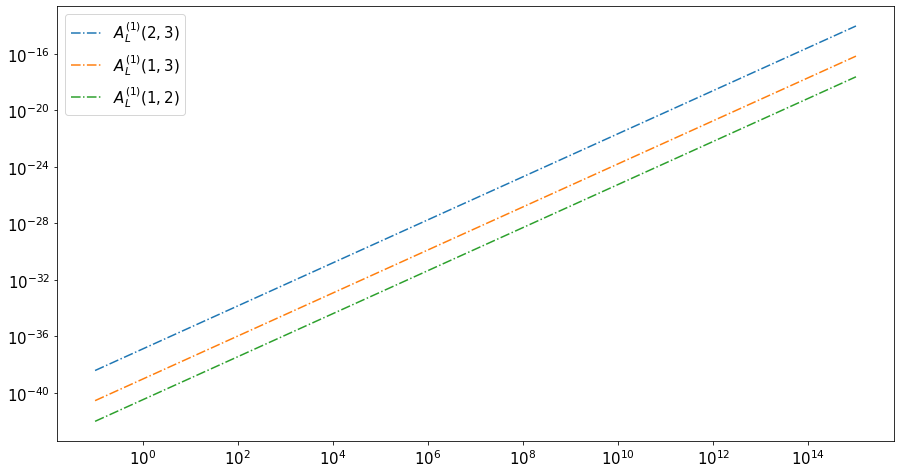

In [93]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(m6np),abs(YLOne23)**2,'-.',label='$A_L^{(1)}(2,3)$')
#plt.loglog(np.real(m6np),abs(YLOne32)**2,'--',label='$A_L^{(1)}(3,2)$')

plt.loglog(np.real(m6np),abs(YLOne13)**2,'-.',label='$A_L^{(1)}(1,3)$')
#plt.loglog(np.real(m6np),abs(YLOne31)**2,'--',label='$A_L^{(1)}(3,1)$')

plt.loglog(np.real(m6np),abs(YLOne12)**2,'-.',label='$A_L^{(1)}(1,2)$')
#plt.loglog(np.real(m6np),abs(YLOne21)**2,'--',label='$A_L^{(1)}(2,1)$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15)

### Form factor with two fermion in the loop.

In [44]:
mnj = symbols('m_{n_j}',positive=True)
Cijs, Cijcs, Ubj = symbols('C_{ij}, {{C_{ij}^*}},U_{bj}')
UnuTwo = {mn[i]:mni,mn[jj]:mnj,C[i,jj]:Cijs, Cc[i,jj]:Cijcs, Uν[b,jj]:Ubj, Uνc[a,i]:Ucai}
UnuTwo

In [154]:
#TrianglesTwoFermion[0].AL().subs(lfvhd.D,4).subs(cambios_hab(2,3)).subs(valores_h).subs(UnuTwo)

In [46]:
def FFsymbolic(k,a,b,quirality='L',common_factor=common_factor_h,type_2HDM=typeI_ξh,valores=valores_h):
    if quirality=='L':
        FF = TrianglesTwoFermion[k].AL()
    elif quirality=='R':
        FF = TrianglesTwoFermion[k].AR()
    else:
        raise ValueError('quirality must be L or R')
    return FF.subs(common_factor).subs(type_2HDM).subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuTwo)
#fsR = lambda k,a,b:TrianglesTwoFermion[k].AR().subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores_h).subs(UnuTwo)

In [33]:
#FFsymbolic(2,2,3).atoms(Symbol)

**Cambiar modelo o scalar**

In [47]:
FFmpL = lambda k,a,b:lambdify([mni,mnj,Ubj,Ucai,Cijs,Cijcs,mHpm_aux,α,β],
                              replaceBs(FFsymbolic(k,a,b,quirality='L'
                            ,common_factor=common_factor_h,
                            type_2HDM=modelo#########
                            ,valores=valores_h).subs(mHpm,mHpm_aux)),
                     modules=[pave_functions(valores_h[mh],a,b,lib='mpmath'),'mpmath'] )

FFmpR = lambda k,a,b:lambdify([mni,mnj,Ubj,Ucai,Cijs,Cijcs,mHpm_aux,α,β],
                              replaceBs(FFsymbolic(k,a,b,quirality='R'
                            ,common_factor=common_factor_h,
                            type_2HDM=modelo#########
                            ,valores=valores_h).subs(mHpm,mHpm_aux)),
                     modules=[pave_functions(valores_h[mh],a,b,lib='mpmath'),'mpmath'] )

In [35]:
#nprint(FFmpL(0,2,3)(1,2,3,4,5,6,7,8,9))

In [48]:
def sumatwo(mm6,k,a,b,mHpm_n,alpha,beta,quirality='L'):
    xs = []
    if quirality=='L':
        g = FFmpL(k,a,b)
    elif quirality=='R':
        g = FFmpR(k,a,b)
    else:
        raise ValueError('quirality must be L or R')
        
    mnk,UnuL, UnuR = diagonalizationMnu1(m1,mm6)
    Unu = UnuL
    Unu_dagger = UnuR
    #Cij = lambda i,j: mp.fsum([Unu[c,i]*conj(Unu[c,j]) for c in range(3)])
    Cij = lambda i,j: mp.fsum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])
    for p in range(1,7):
        for q in range(1,7):
            #x = g(mnk[p-1],mnk[q-1],Unu[b-1,q-1],conj(Unu[a-1,p-1]),Cij(p-1,q-1),conj(Cij(p-1,q-1)),mHpm_n,alpha,beta)
            x = g(mnk[p-1],mnk[q-1],Unu[b-1,q-1],Unu_dagger[p-1,a-1],Cij(p-1,q-1),conj(Cij(p-1,q-1)),mHpm_n,alpha,beta)
            xs.append(x)
            #print(f'i = {p} and j = {q}')
            #print(f'|f| = {x}')
    return mp.fsum(xs)

In [49]:
def totaltwo(m6,a,b,mHpm_n,alpha,beta,quirality='L'):
    #print('Inside totaltwo')
    #print('doble suma sobre i j')
    out = (sumatwo(m6,0,a,b,mHpm_n,alpha,beta,quirality) + sumatwo(m6,1,a,b,mHpm_n,alpha,beta,quirality)
           + sumatwo(m6,2,a,b,mHpm_n,alpha,beta,quirality))
    #print('doble suma sobre i j terminada')
    return out

In [137]:
for k in range(3):
    
    print('-'*30)
    print('23')
    nprint(sumatwo(mp.mpf('1000.0'),k,2,3,mHpm_val,α_val,β_val,quirality='L'))
    print('13')
    nprint(sumatwo(mp.mpf('1000.0'),k,1,3,mHpm_val,α_val,β_val,quirality='L'))
    print('12')
    nprint(sumatwo(mp.mpf('1000.0'),k,1,2,mHpm_val,α_val,β_val,quirality='L'))

print('-'*30)
print('Total 23')
nprint(abs(totaltwo(mp.mpf('1000.0'),2,3,mHpm_val,α_val,β_val,quirality='L')))
print('Total 13')
nprint(abs(totaltwo(mp.mpf('1000.0'),1,3,mHpm_val,α_val,β_val,quirality='L')))
print('Total 12')
nprint(abs(totaltwo(mp.mpf('1000.0'),1,2,mHpm_val,α_val,β_val,quirality='L')))
print('-'*30)

------------------------------
23
(-3.35709e-20 - 9.28041e-30j)
13
(-2.8712e-21 - 3.20565e-32j)
12
(-4.9938e-22 + 2.29888e-32j)
------------------------------
23
(-5.77936e-23 + 2.13066e-29j)
13
(-5.04247e-24 + 4.86149e-32j)
12
(-1.33902e-24 - 5.46517e-32j)
------------------------------
23
(3.42195e-18 - 2.09173e-23j)
13
(2.9296e-19 - 3.70155e-24j)
12
(5.23194e-20 - 3.36932e-26j)
------------------------------
Total 23
3.38832e-18
Total 13
2.90084e-19
Total 12
5.18187e-20
------------------------------


In [50]:
def ALTwoTot23(m6,mHpm_n,alpha,beta):
    return totaltwo(m6,2,3,mHpm_n,alpha,beta,quirality='L')
def ARTwoTot23(m6,mHpm_n,alpha,beta): 
    return totaltwo(m6,2,3,mHpm_n,alpha,beta,quirality='R')

#def ALTwoTot32(m6,mHpm_n,alpha,beta): 
#return totaltwo(m6,3,2,mHpm_n,alpha,beta,quirality='L')
#def ARTwoTot32(m6,mHpm_n,alpha,beta): 
#return totaltwo(m6,3,2,mHpm_n,alpha,beta,quirality='R')

def ALTwoTot13(m6,mHpm_n,alpha,beta): 
    return totaltwo(m6,1,3,mHpm_n,alpha,beta,quirality='L')
def ARTwoTot13(m6,mHpm_n,alpha,beta): 
    return totaltwo(m6,1,3,mHpm_n,alpha,beta,quirality='R')

#def ALTwoTot31(m6,mHpm_n,alpha,beta): 
#return totaltwo(m6,3,1,mHpm_n,alpha,beta,quirality='L')
#def ARTwoTot31(m6,mHpm_n,alpha,beta): 
#return totaltwo(m6,3,1,mHpm_n,alpha,beta,quirality='R')
def ALTwoTot12(m6,mHpm_n,alpha,beta): 
    return totaltwo(m6,1,2,mHpm_n,alpha,beta,quirality='L')
def ARTwoTot12(m6,mHpm_n,alpha,beta): 
    return totaltwo(m6,1,2,mHpm_n,alpha,beta,quirality='R')

#def ALTwoTot21(m6,mHpm_n,alpha,beta): 
#return totaltwo(m6,2,1,mHpm_n,alpha,beta,quirality='L')
#def ARTwoTot21(m6,mHpm_n,alpha,beta): 
#return totaltwo(m6,2,1,mHpm_n,alpha,beta,quirality='R')

In [138]:
nprint((abs(ALTwoTot23(mp.mpf('1000.0'),mHpm_val,α_val,β_val))))
nprint((abs(ALTwoTot13(mp.mpf('1000.0'),mHpm_val,α_val,β_val))))
nprint((abs(ALTwoTot12(mp.mpf('1000.0'),mHpm_val,α_val,β_val))))

3.38832e-18
2.90084e-19
5.18187e-20


## Total Form Factors

In [139]:
#a = 2, b = 3
def ALtot23(m6,mHpm_n, mA_n, alpha, beta, l5):
    ALOne = ALOneTot23(m6,mHpm_n, mA_n, alpha, beta, l5)
    ALTwo = ALTwoTot23(m6,mHpm_n,alpha,beta)
    print('ALOne23 =')
    nprint(ALOne)
    print('ALTwo23 =')
    nprint(ALTwo)
    return  ALOne + ALTwo
def ARtot23(m6,mHpm_n, mA_n, alpha, beta, l5):
    AROne = AROneTot23(m6,mHpm_n, mA_n, alpha, beta, l5)
    ARTwo = ARTwoTot23(m6,mHpm_n,alpha,beta)
    print('AROne23 =')
    nprint(AROne)
    print('ARTwo23 =')
    nprint(ARTwo)
    return  AROne + ARTwo

#a = 3, b = 2
# def ALtot32(m6,mHpm_n, mA_n, alpha, beta, l5):
#     return  ALOneTot32(m6,mHpm_n, mA_n, alpha, beta, l5) + ALTwoTot32(m6,mHpm_n,alpha,beta)
# def ARtot32(m6,mHpm_n, mA_n, alpha, beta, l5):
#     return  AROneTot32(m6,mHpm_n, mA_n, alpha, beta, l5) + ARTwoTot32(m6,mHpm_n,alpha,beta)

#a = 1, b = 3
def ALtot13(m6,mHpm_n, mA_n, alpha, beta, l5):
    ALOne = ALOneTot13(m6,mHpm_n, mA_n, alpha, beta, l5)
    ALTwo = ALTwoTot13(m6,mHpm_n,alpha,beta)
    print('ALOne13 =')
    nprint(ALOne)
    print('ALTwo13 =')
    nprint(ALTwo)
    return  ALOne + ALTwo
def ARtot13(m6,mHpm_n, mA_n, alpha, beta, l5):
    AROne = AROneTot13(m6,mHpm_n, mA_n, alpha, beta, l5)
    ARTwo = ARTwoTot13(m6,mHpm_n,alpha,beta)
    print('AROne13 =')
    nprint(AROne)
    print('ARTwo13 =')
    nprint(ARTwo)
    return  AROne + ARTwo

#a = 3, b = 1
# def ALtot31(m6,mHpm_n, mA_n, alpha, beta, l5):
#     return  ALOneTot31(m6,mHpm_n, mA_n, alpha, beta, l5) + ALTwoTot31(m6,mHpm_n,alpha,beta)
# def ARtot31(m6,mHpm_n, mA_n, alpha, beta, l5):
#     return  AROneTot31(m6,mHpm_n, mA_n, alpha, beta, l5) + ARTwoTot31(m6,mHpm_n,alpha,beta)

#a = 1, b = 2
def ALtot12(m6,mHpm_n, mA_n, alpha, beta, l5):
    ALOne = ALOneTot12(m6,mHpm_n, mA_n, alpha, beta, l5)
    ALTwo = ALTwoTot12(m6,mHpm_n,alpha,beta)
    print('ALOne12 =')
    nprint(ALOne)
    print('ALTwo12 =')
    nprint(ALTwo)
    return  ALOne + ALTwo
def ARtot12(m6,mHpm_n, mA_n, alpha, beta, l5):
    AROne = AROneTot12(m6,mHpm_n, mA_n, alpha, beta, l5)
    ARTwo = ARTwoTot12(m6,mHpm_n,alpha,beta)
    print('AROne12 =')
    nprint(AROne)
    print('ARTwo12 =')
    nprint(ARTwo)
    return  AROne + ARTwo

#a = 2, b = 1
# def ALtot21(m6,mHpm_n, mA_n, alpha, beta, l5):
#     return  ALOneTot21(m6,mHpm_n, mA_n, alpha, beta, l5) + ALTwoTot21(m6,mHpm_n,alpha,beta)
# def ARtot21(m6,mHpm_n, mA_n, alpha, beta, l5):
#     return  AROneTot21(m6,mHpm_n, mA_n, alpha, beta, l5) + ARTwoTot21(m6,mHpm_n,alpha,beta)

In [140]:
%%time
# print('AL23 = ')
# nprint(abs(ALtot23(mp.mpf('1e10'),mHpm_val,mA_val,α_val,β_val,l5_val)))
# print('AR23 = ')
# nprint(abs(ARtot23(mp.mpf('1e10'),mHpm_val,mA_val,α_val,β_val,l5_val)))
print('AL13 = ')
nprint(abs(ALtot13(mp.mpf('1e10'),mHpm_val,mA_val,α_val,β_val,l5_val)))
print('AR13 = ')
nprint(abs(ARtot13(mp.mpf('1e10'),mHpm_val,mA_val,α_val,β_val,l5_val)))
print('-'*94)
print('AL12 = ')
nprint(abs(ALtot12(mp.mpf('1e10'),mHpm_val,mA_val,α_val,β_val,l5_val)))
print('AR12 = ')
nprint(abs(ARtot12(mp.mpf('1e10'),mHpm_val,mA_val,α_val,β_val,l5_val)))

AL13 = 
ALOne13 =
(-9.44008e-12 - 7.85373e-13j)
ALTwo13 =
(9.44008e-12 - 1.09815e-16j)
7.85483e-13
AR13 = 
AROne13 =
(-3.28253e-8 - 2.73092e-9j)
ARTwo13 =
(3.28253e-8 - 4.24284e-14j)
2.73096e-9
----------------------------------------------------------------------------------------------
AL12 = 
ALOne12 =
(-1.71822e-12 - 1.45674e-13j)
ALTwo12 =
(1.71822e-12 - 4.89298e-18j)
1.45678e-13
AR12 = 
AROne12 =
(-3.55278e-10 - 3.01211e-11j)
ARTwo12 =
(3.55278e-10 - 4.50298e-16j)
3.01215e-11
CPU times: user 1min 23s, sys: 20 ms, total: 1min 23s
Wall time: 1min 23s


In [76]:
def betaf(tb):
    return mp.atan(tb)
def alphaf(tb,x0=mp.mpf('0.95')):
    return mp.atan(tb) - mp.acos(x0)

In [141]:
mHpm_val = mp.mpf('1500.0') 
mA_val = mp.mpf('1300.0') 
l5_val = mp.mpf('1') 
m6_val = mp.mpf('1e15')
# Φ =2

In [142]:
def ALtot23_caso1(tb):
    return ALtot23(m6_val,mHpm_n=mHpm_val, mA_n=mA_val,alpha=alphaf(tb),beta=betaf(tb),l5=l5_val)
def ARtot23_caso1(tb):
    return ARtot23(m6_val,mHpm_n=mHpm_val, mA_n=mA_val,alpha=alphaf(tb),beta=betaf(tb),l5=l5_val)


def ALtot13_caso1(tb):
    return ALtot13(m6_val,mHpm_n=mHpm_val, mA_n=mA_val,alpha=alphaf(tb),beta=betaf(tb),l5=l5_val)
def ARtot13_caso1(tb):
    return ARtot13(m6_val,mHpm_n=mHpm_val, mA_n=mA_val,alpha=alphaf(tb),beta=betaf(tb),l5=l5_val)


def ALtot12_caso1(tb):
    return ALtot12(m6_val,mHpm_n=mHpm_val, mA_n=mA_val,alpha=alphaf(tb),beta=betaf(tb),l5=l5_val)
def ARtot12_caso1(tb):
    return ARtot12(m6_val,mHpm_n=mHpm_val, mA_n=mA_val,alpha=alphaf(tb),beta=betaf(tb),l5=l5_val)

## Width decay of $h \to e_a e_b$

In [143]:
from OneLoopLFVHD import Γhlilj 
# def Γhlilj(ML,MR,ma=mpf('125.18'),mi=ml[2],mj=ml[3]):
#     r = 1/(8 *pi* ma)*sqrt((1-((mi**2+mj**2)/ma)**2)*(1-((mi**2-mj**2)/ma)**2))*((ma**2 - mi**2 - mj**2)*(abs(ML)**2 + abs(MR)**2)-4*mi*mj*re(ML*conj(MR)))
#     return r

In [144]:
def Γhlilj(ML,MR,ma=125.18,mi=1.777,mj=0.1507):
    sqrt_term = np.sqrt((1-((mi**2+mj**2)/ma)**2)*(1-((mi**2-mj**2)/ma)**2))
    #print('sqrt term = ',sqrt_term)
    maij = ma**2 - mi**2 - mj**2
    print('maij = ',maij)
    A = maij*(np.abs(ML)**2 + np.abs(MR)**2)
    B = 4*mi*mj*np.real(ML*np.conj(MR))
    print('A = ',A)
    print('B = ',B)
    r = 1/(8*np.pi* ma)*sqrt_term*(A-B)
    return r

In [92]:
import sympy as sp
ma,mi,mj = sp.symbols('m_a, m_i, m_j',positive=True)
ML, MR = sp.symbols('M_L, MR')

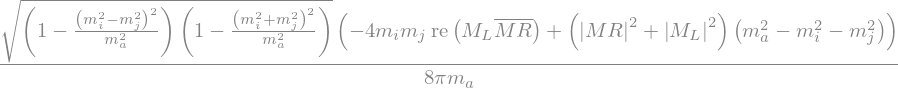

In [94]:
r = 1/(8*sp.pi* ma)*sp.sqrt((1-((mi**2+mj**2)/ma)**2)*(1-((mi**2-mj**2)/ma)**2))*((ma**2 - mi**2 - mj**2)*(abs(ML)**2 + abs(MR)**2)-4*mi*mj*sp.re(ML*sp.conjugate(MR)))
r

In [145]:
def Γhl2l3(tb):
    return Γhlilj(ALtot23_caso1(tb),ARtot23_caso1(tb),
                  ma=valores_h[mh],mi=ml[2],mj=ml[3])


def Γhl1l3(tb):
    return Γhlilj(ALtot13_caso1(tb),ARtot13_caso1(tb),
                  ma=valores_h[mh],mi=ml[1],mj=ml[3])


def Γhl1l2(tb):
    return Γhlilj(ALtot12_caso1(tb),ARtot12_caso1(tb),
                  ma=valores_h[mh],mi=ml[1],mj=ml[2])

### Aproximation

In [149]:
def Γhlilj(ML,MR,ma=125.18):
    maij = ma**2# - mi**2 - mj**2
    # print('maij = ',maij)
    A = maij*(np.abs(ML)**2 + np.abs(MR)**2)
    #B = 4*mi*mj*np.real(ML*np.conj(MR))
    print('A = ')
    nprint(A)
    #print('B = ',B)
    r = 1/(8*np.pi* ma)*(A)
    return r

In [152]:
def Γhl2l3(tb):
    AL = ALtot23_caso1(tb)
    AR = ARtot23_caso1(tb)
    print('|AL|^2 = ')
    nprint(abs(AL)**2)
    print('|AR|^2 = ')
    nprint(abs(AR)**2)
    return Γhlilj(AL,AR,ma=valores_h[mh])


def Γhl1l3(tb):
    AL = ALtot13_caso1(tb)
    AR = ARtot13_caso1(tb)
    print('|AL|^2 = ')
    nprint(abs(AL)**2)
    print('|AR|^2 = ')
    nprint(abs(AR)**2)
    return Γhlilj(AL,AR,ma=valores_h[mh])


def Γhl1l2(tb):
    AL = ALtot12_caso1(tb)
    AR = ARtot12_caso1(tb)
    print('|AL|^2 = ')
    nprint(abs(AL)**2)
    print('|AR|^2 = ')
    nprint(abs(AR)**2)
    return Γhlilj(AL,AR,ma=valores_h[mh])

In [153]:
%%time
tb = mp.mpf('1.0')
nprint(Γhl2l3(tb))
nprint(Γhl1l3(tb))
nprint(Γhl1l2(tb))

ALOne23 =
(-2.47717e-25 - 2.08689e-7j)
ALTwo23 =
(-6.04422e-12 - 2.87068e-8j)
AROne23 =
(-1.47092e-26 - 3.50947e-6j)
ARTwo23 =
(-1.23719e-9 - 5.36401e-8j)
|AL|^2 = 
5.63566e-14
|AR|^2 = 
1.26957e-11
A = 
1.9957e-7
6.34745e-11
ALOne13 =
(3.87412e-17 - 1.78929e-8j)
ALTwo13 =
(-2.81088e-19 - 2.79736e-9j)
AROne13 =
(1.11414e-20 - 6.22174e-5j)
ARTwo13 =
(-5.72932e-11 - 1.08079e-6j)
|AL|^2 = 
4.28085e-16
|AR|^2 = 
4.00667e-9
A = 
6.27044e-5
1.99435e-8
ALOne12 =
(1.0006e-18 - 3.31883e-9j)
ALTwo12 =
(1.96039e-20 - 1.2464e-10j)
AROne12 =
(4.83918e-21 - 6.86237e-7j)
ARTwo12 =
(1.69435e-14 - 1.14706e-8j)
|AL|^2 = 
1.18575e-17
|AR|^2 = 
4.86796e-13
A = 
7.61856e-9
2.42312e-12
CPU times: user 2min 13s, sys: 40 ms, total: 2min 13s
Wall time: 2min 13s


In [96]:
# n = 200#800
# expmp = linspace(-1,15,n)
# m6np = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [84]:
n = 20#800
# tbmp = linspace(0.1,100,n)
expmp = linspace(-1,2,n)
tbmp = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [85]:
%%time
YW23 = speedup_array(Γhl2l3,tbmp)

YW13 = speedup_array(Γhl1l3,tbmp)

YW12 = speedup_array(Γhl1l2,tbmp)


CPU times: user 160 ms, sys: 117 ms, total: 276 ms
Wall time: 23min 54s


In [86]:
Wtot = YW23 + YW13 + YW12 + 0.0032# + YW32 + YW31 + YW21

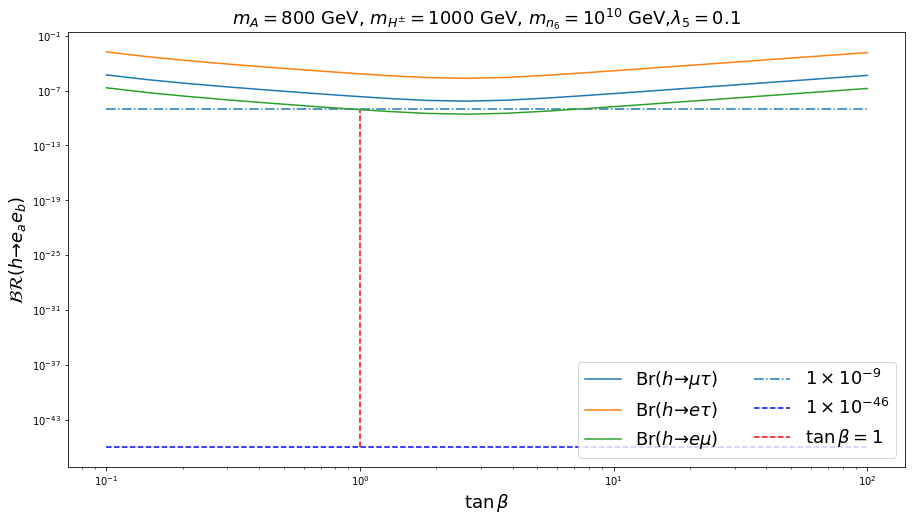

In [87]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(tbmp),(YW23)/Wtot,label=r'Br($h \to \mu \tau$)')
plt.loglog(np.real(tbmp),(YW13)/Wtot,label=r'Br($h \to e \tau$)')
plt.loglog(np.real(tbmp),(YW12)/Wtot,label=r'Br($h \to e \mu$)')

# Horizontal lines
plt.hlines(1e-9,0.1,1e2,linestyles='-.',label=r'$1\times 10^{-9}$')
plt.hlines(1e-46,0.1,1e2,linestyles='--',color='b',label=r'$1\times 10^{-46}$')

# Vertical lines
plt.vlines(1,1e-46,1e-9,linestyles='--',color='r',label=r'$\tan{\beta}=1$')

#Axis
#plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=18)
#plt.xticks([0.1,1,10,100],fontsize=18)
plt.xlabel(r'$\tan{\beta}$',fontsize=18)
plt.ylabel(r'$\mathcal{BR}(h \to e_a e_b)$',fontsize=18)


plt.title(r'$m_A=800$ GeV, $m_{H^{\pm}}=1000$ GeV, $m_{n_6}={10^{10}}$ GeV,$\lambda_5=0.1$',fontsize=18)
plt.legend(fontsize=18,frameon=True,ncol=2,loc=4)
#plt.savefig('2HDM-lepton-specific-Cba0.95-caso5.png',dpi=100)

In [66]:
import pandas as pd

In [67]:
df = pd.DataFrame({'tb':tbmp,
                   'Whl2l3':YW23,
                   #'Whl3l2':YW32,
                   'Whl1l3':YW13,
                   #'Whl3l1':YW31,
                   'Whl1l2':YW12})
                   #'Whl2l1':YW21})

## Casos 2HDM type I

In [ ]:
#type I cos(beta - alpha)=0.95 1 mHpm >mA caso 1
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('0.1')
# m6_val = mp.mpf('1e10') <--------
# Φ = 2

#type I cos(beta - alpha)=0.95 1 mHpm >mA caso 2
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('0.1')
# m6_val = mp.mpf('1e15') <--------
# Φ = 2

#type I cos(beta - alpha)=0.95 1 mHpm >mA caso 3
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('1') <--------
# m6_val = mp.mpf('1e15')
# Φ = 2

#type I cos(beta - alpha)=0.95 1 mHpm >mA caso 4
# mHpm_val = mp.mpf('1500.0') <--------
# mA_val = mp.mpf('1300.0') <--------
# l5_val = mp.mpf('1') <--------
# m6_val = mp.mpf('1e15')
# Φ =2

## Casos 2HDM Lepton-Specific

In [ ]:
# Lepton-specific cos(beta - alpha)=0.95 mHpm >mA caso 1
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('0.1')
# m6_val = mp.mpf('1e10') <--------
# Φ = 1

# Lepton-specific cos(beta - alpha)=0.95 mHpm >mA caso 2
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('0.1')
# m6_val = mp.mpf('1e15') 
# Φ = 1

# Lepton-specific cos(beta - alpha)=0.95 1 mHpm >mA caso 3
# mHpm_val = mp.mpf('1000.0')
# mA_val = mp.mpf('800.0')
# l5_val = mp.mpf('1') <--------
# m6_val = mp.mpf('1e15')
# Φ = 2

# Lepton-specific cos(beta - alpha)=0.95 1 mHpm >mA caso 4
# mHpm_val = mp.mpf('1500.0') <--------
# mA_val = mp.mpf('1300.0') <--------
# l5_val = mp.mpf('1') <--------
# m6_val = mp.mpf('1e15')
# Φ =2

In [68]:
df.to_csv('Lepton_specific_Cab095_caso5_mA800_mHpm1000.txt',sep='\t')

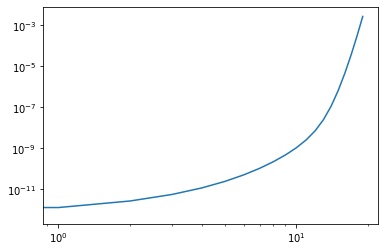

In [69]:
plt.loglog(np.array(list(map(mpf,df['tb']))),np.array(list(map(mpf,df['Whl2l3']))))